# Loading the Libraries

# List of all the Fields:
- RI: refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron

Type of glass: (class attribute) 1 building_windows_float_processed 2 building_windows_non_float_processed 3 vehicle_windows_float_processed 4 vehicle_windows_non_float_processed (none in this database) 5 containers 6 tableware 7 headlamps



In [17]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from subprocess import check_output

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the Data

In [7]:
glass = pd.read_csv('glass.csv')

In [20]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Cleaning Up and Checking for Null Values

In [21]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


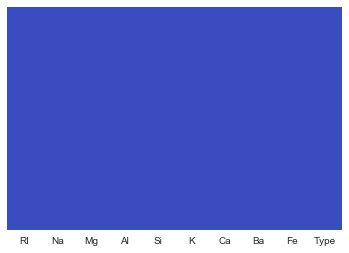

In [22]:
sns.heatmap(glass.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [23]:
X = glass.drop(['Type'], axis=1)
Y = glass['Type']

In [24]:
glass.corr()['Type'].abs().sort_values(ascending=False)

Type    1.000000
Mg      0.744993
Al      0.598829
Ba      0.575161
Na      0.502898
Fe      0.188278
RI      0.164237
Si      0.151565
K       0.010054
Ca      0.000952
Name: Type, dtype: float64

# Machine Learning Tools

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import math

In [28]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, Y, test_size=0.30, random_state=153)

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
param_grid = { "criterion" : ["gini", "entropy"]
              , "min_samples_leaf" : [1, 5, 10]
              , "min_samples_split" : [2, 4, 10, 12, 16]
              , "n_estimators": [100, 125, 200]}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
gs = gs.fit(X_tr, y_tr)

In [29]:
print(gs.best_score_)
print(gs.best_params_)

0.785234899329
{'min_samples_split': 2, 'min_samples_leaf': 1, 'n_estimators': 200, 'criterion': 'gini'}


# Random Forest Classifier

In [31]:
rf = RandomForestClassifier( criterion='entropy', 
                             n_estimators=200,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

rf.fit(X_tr, y_tr)
pred = rf.predict(X_ts)

score = rf.score(X_ts, y_ts)
err = math.sqrt(((pred - y_ts)**2).mean())
print("Error: %.3f Score: %.3f" % (err, score))

Error: 1.253 Score: 0.708


In [32]:
pd.concat((pd.DataFrame(X.columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
2,Mg,0.242187
3,Al,0.158750
6,Ca,0.118455
7,Ba,0.113829
0,RI,0.110221
1,Na,0.091497
5,K,0.076913
4,Si,0.065784
8,Fe,0.022365
